## Machine Learning Module (Project)
### Domain : Banking
### Dataset : Loan Payments

### Objective : In the Loan Payment dataset, We would like to perform classification on Loan_status variable that contains three categories namely PAIDOFF, COLLETION AND COLLECTION_PAIDOFF. 

### Solution : This analysis will generate valuable insights for banks to consider which customers they will provide loan to.

### Approach: We will try 3 to 4 algorithms and display results 

### Steps  EDA,Visualisations, Model Building and Conclusions.

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing

import matplotlib.pyplot as plt
import seaborn as sns # Visualizations tools
%matplotlib inline

import pandas_profiling  #Data insights 

import warnings
warnings.filterwarnings("ignore") 

In [5]:
# File download and assign it to a varaible named loan_payment
loan_payment = pd.read_csv("C:/Users/RAVI/Favorites/Downloads/UPX Material/Machine Learning/Project datasets/Loan Payment/Loan payments data.csv")

#### EDA In this section, let's explore the data in-depth.

In [8]:
loan_payment.head(10)

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,09/08/2016,10/07/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,09/08/2016,10/07/2016,10/07/2016 09:00,NaN,50,Bachelor,female
2,xqd20160003,PAIDOFF,1000,30,09/08/2016,10/07/2016,9/25/2016 16:58,NaN,33,Bachelor,female
3,xqd20160004,PAIDOFF,1000,15,09/08/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,09/09/2016,10/08/2016,9/23/2016 21:36,NaN,28,college,female
5,xqd20160706,PAIDOFF,300,7,09/09/2016,9/15/2016,09/09/2016 13:45,NaN,35,Master or Above,male
6,xqd20160007,PAIDOFF,1000,30,09/09/2016,10/08/2016,10/07/2016 23:07,NaN,29,college,male
7,xqd20160008,PAIDOFF,1000,30,09/09/2016,10/08/2016,10/05/2016 20:33,NaN,36,college,male
8,xqd20160909,PAIDOFF,1000,30,09/09/2016,10/08/2016,10/08/2016 16:00,NaN,28,college,male
9,xqd20160010,PAIDOFF,800,15,09/10/2016,9/24/2016,9/24/2016 13:00,NaN,26,college,male


__Comment__: Quick note from the above data sample, we can see that it's making sense for those who have paid the loan off,not have data in past_due_days columns.

#### loan_status : This field is actually the target variable we are trying to predict.

In [6]:
loan_payment['loan_status'].unique()

array(['PAIDOFF', 'COLLECTION', 'COLLECTION_PAIDOFF'], dtype=object)

__Comment__: We have 3 labels for this target variables with the ratio of 3:1:1 (paid off: collection : collection paid off).

In [7]:
pandas_profiling.ProfileReport(loan_payment) # Total insights of our data 

Number of variables,11
Number of observations,500
Total Missing (%),7.3%
Total size in memory,29.3 KiB
Average record size in memory,60.1 B
Numeric,4
Categorical,6
Boolean,0
Date,0
Text (Unique),1
Rejected,0


In [9]:
loan_payment.groupby('loan_status')['Gender'].agg(['count'])  #Counting no of records for all 3 statuses 

,count
loan_status,
COLLECTION,100
COLLECTION_PAIDOFF,100
PAIDOFF,300


['PAIDOFF' 'COLLECTION' 'COLLECTION_PAIDOFF']


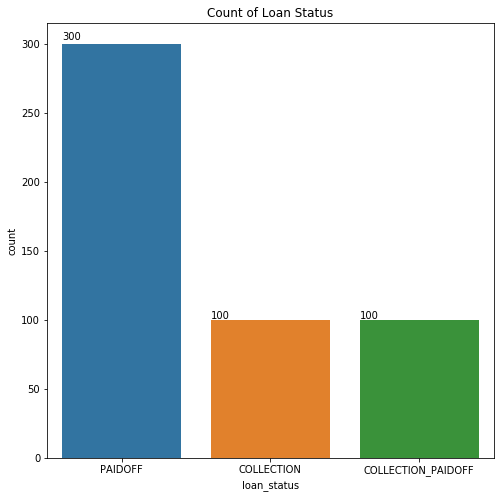

In [10]:
print(loan_payment.loan_status.unique())

#Visualising the three loan statuses using countplot
fig = plt.figure(figsize=(8,8))
ax = sns.countplot(loan_payment.loan_status)
ax.set_title("Count of Loan Status")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))
plt.show()

>#### Principal : Basic principal loan amount at the origination terms, could be weekly (7 days), biweekly and monthly payoff schedule

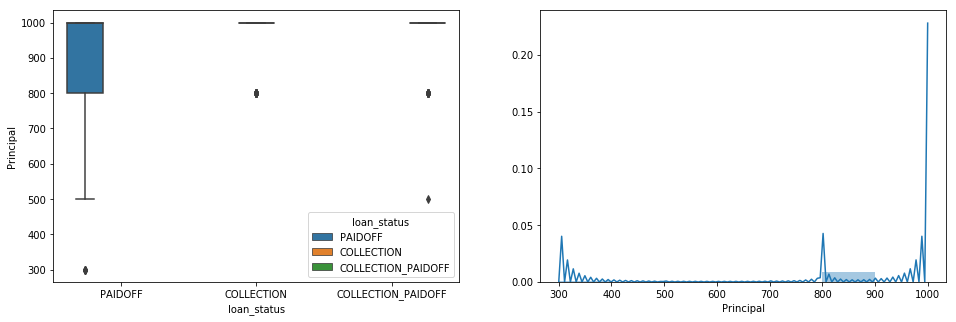

In [11]:
#Principal is time taken for the each customer to paid the full loan 
fig, axs = plt.subplots(1, 2, figsize=(16, 5))
sns.boxplot(x='loan_status', y='Principal', data=loan_payment, hue='loan_status', ax=axs[0])
sns.distplot(loan_payment.Principal, bins=range(300, 1000, 100), ax=axs[1], kde=True)
plt.show();

__Comment __:Based on the distribution alone, majority of the principal is 1,000 (USD). Below aggregation shows more detail of the Principal with loan_status.

In [12]:
# Looking at these 3 statuses and their principal time to break the records count
print(loan_payment[['loan_status', 'Principal', 'Loan_ID']].groupby(['loan_status', 'Principal']).agg(['count']))

                             Loan_ID
                               count
loan_status        Principal        
COLLECTION         800            23
                   1000           77
COLLECTION_PAIDOFF 500             1
                   800            19
                   1000           80
PAIDOFF            300             6
                   500             2
                   700             1
                   800            69
                   900             2
                   1000          220


>#### Terms :This is the payoff schedule, which can be in week, month etc.

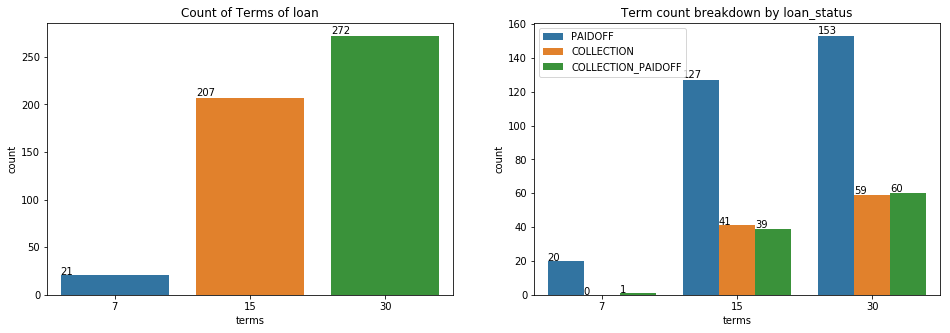

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(16,5))
sns.countplot(loan_payment.terms, ax=axs[0])
axs[0].set_title("Count of Terms of loan")
for p in axs[0].patches:
    axs[0].annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

sns.countplot(x='terms', hue='loan_status', data=loan_payment, ax=axs[1])
axs[1].set_title("Term count breakdown by loan_status")
for t in axs[1].patches:
    if (np.isnan(float(t.get_height()))):
        axs[1].annotate(0, (t.get_x(), 0))
    else:
        axs[1].annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

axs[1].legend(loc='upper left')
plt.show();

__Comment__:effective_date, due_date, paid_off_time and past_due_days
These data points are essentially related to the date of the loan and payment.

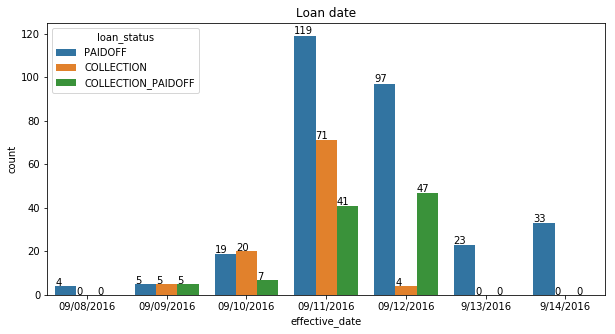

In [14]:
fig = plt.figure(figsize=(10,5))
ax = sns.countplot(x='effective_date', hue='loan_status', data=loan_payment)
ax.set_title('Loan date')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
plt.show();

# Note: if we think that the day of week, or month has the significant factor to the loan status
# Below is the function which we can use to extract the year, month, or day:
# pd.DatetimeIndex(loan_data.effective_date).year
# pd.DatetimeIndex(loan_data.effective_date).month
# pd.DatetimeIndex(loan_data.effective_date).day

>__Comment__: It looks like this is snapshot of the 7-day loan data, with 11-September has the most loan(count will be 500)

**In the below figure, is there any pattern of the pay off date? I am adding new column paid_off_date from the paid_off_time.**

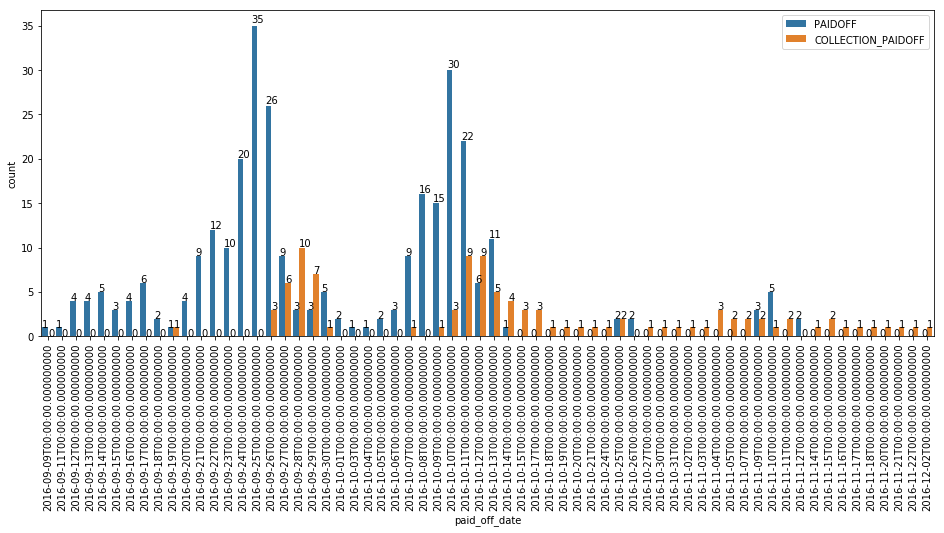

In [15]:
loan_payment['paid_off_date'] = pd.DatetimeIndex(loan_payment.paid_off_time).normalize()
fig = plt.figure(figsize=(16, 6))
ax = sns.countplot(x='paid_off_date', data=loan_payment.loc[loan_payment.loan_status.isin(['COLLECTION_PAIDOFF', 'PAIDOFF'])] , hue='loan_status')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

ax.legend(loc='upper right')
plt.show();

__Comment__: As expected, people are more likely to pay off the loan on the last day. Big spike on day 14 and day 29 for 15-day and 30-day terms, respectively.

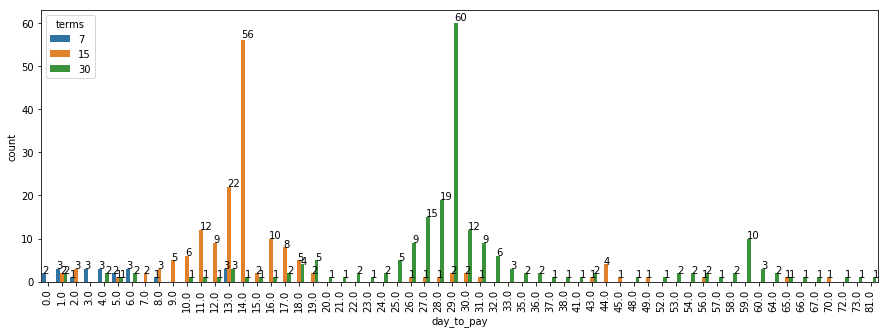

In [16]:
# Compute the day to pay-off the loan
loan_payment['day_to_pay'] = (pd.DatetimeIndex(loan_payment.paid_off_time).normalize() - pd.DatetimeIndex(loan_payment.effective_date).normalize()) / np.timedelta64(1, 'D')

fig = plt.figure(figsize=(15, 5))
ax = sns.countplot(x='day_to_pay', hue='terms', data=loan_payment)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate('', (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
        
plt.show();

>** Let's see the distribution of PAIDOFF, what days do they normally pay off the loan?**

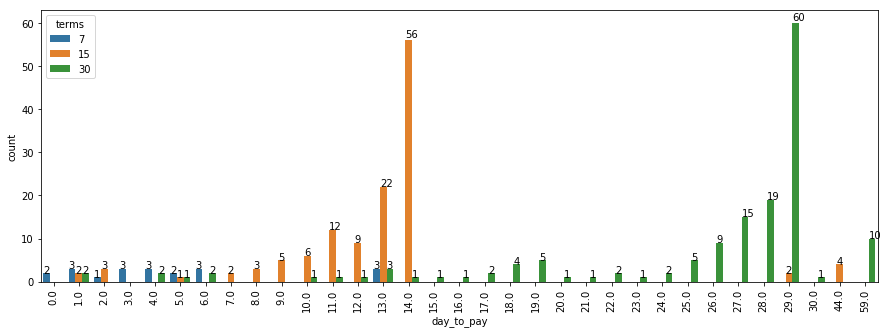

In [17]:
fig = plt.figure(figsize=(15, 5))
ax = sns.countplot(x='day_to_pay', hue='terms', data=loan_payment.loc[loan_payment.loan_status == 'PAIDOFF'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate('', (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
        
plt.show();

>Observation: We tend to pay the bills last day, so in the above figure there are couple of spikes on Day 14 and 29 respectively

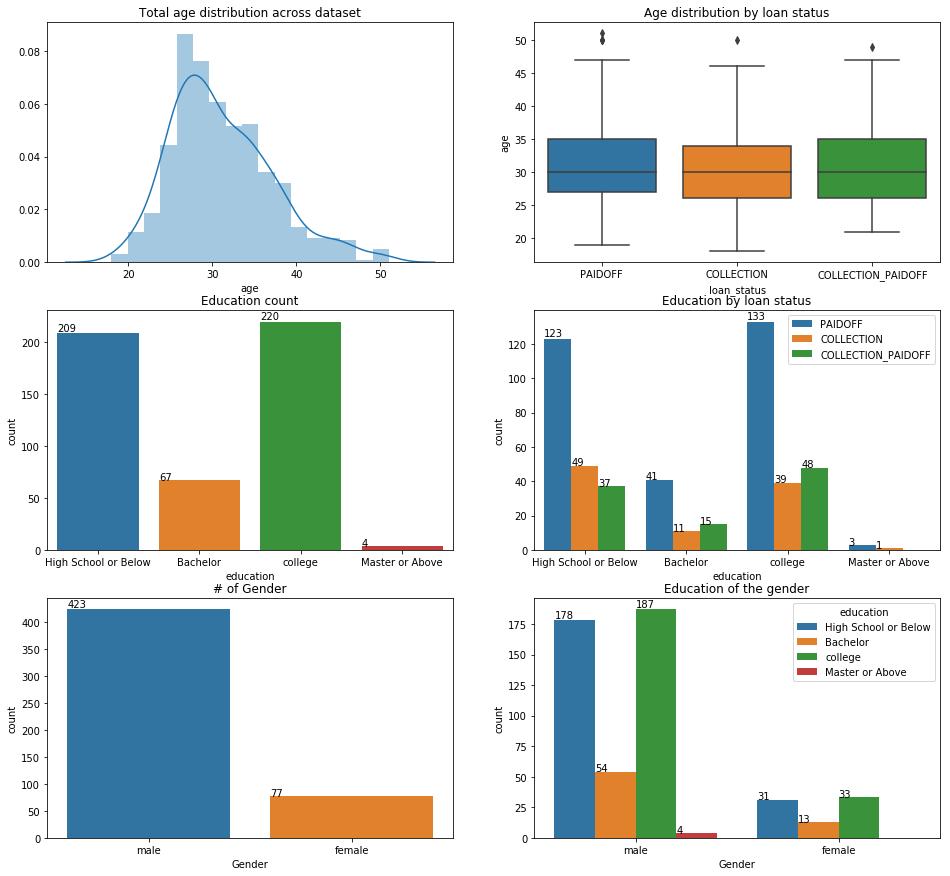

In [18]:
#Using dist and box plots i am checking age dist and loan status across our dataset
fig, axs = plt.subplots(3, 2, figsize=(16, 15))
sns.distplot(loan_payment.age, ax=axs[0][0])
axs[0][0].set_title("Total age distribution across dataset")
sns.boxplot(x='loan_status', y='age', data=loan_payment, ax=axs[0][1])
axs[0][1].set_title("Age distribution by loan status")
sns.countplot(x='education', data=loan_payment, ax=axs[1][0])
axs[1][0].set_title("Education count")
for t in axs[1][0].patches:
    if (np.isnan(float(t.get_height()))):
        axs[1][0].annotate('', (t.get_x(), 0))
    else:
        axs[1][0].annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

#Using count plot i am checking Education and loan status across our dataset        
sns.countplot(x='education', data=loan_payment, hue='loan_status', ax=axs[1][1])
axs[1][1].set_title("Education by loan status")
for t in axs[1][1].patches:
    if (np.isnan(float(t.get_height()))):
        axs[1][1].annotate('', (t.get_x(), 0))
    else:
        axs[1][1].annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

axs[1][1].legend(loc='upper right')
sns.countplot(x='Gender', data=loan_payment, ax=axs[2][0])
axs[2][0].set_title("# of Gender")
for t in axs[2][0].patches:
    if (np.isnan(float(t.get_height()))):
        axs[2][0].annotate('', (t.get_x(), 0))
    else:
        axs[2][0].annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))


#Using count plot i am checking Gender and Educationcount on gender across our dataset              
sns.countplot(x='Gender', data=loan_payment, hue='education', ax=axs[2][1])
axs[2][1].set_title("Education of the gender")
for t in axs[2][1].patches:
    if (np.isnan(float(t.get_height()))):
        axs[2][1].annotate('', (t.get_x(), 0))
    else:
        axs[2][1].annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

plt.show();

In [19]:
# Quick view on education + gender => impact to loan_status
pd.crosstab(loan_payment.loan_status, loan_payment.Gender + "_" + loan_payment.education, margins=True)

col_0,female_Bachelor,female_High School or Below,female_college,male_Bachelor,male_High School or Below,male_Master or Above,male_college,All
loan_status,,,,,,,,
COLLECTION,0,7,3,11,42,1,36,100
COLLECTION_PAIDOFF,1,5,8,14,32,0,40,100
PAIDOFF,12,19,22,29,104,3,111,300
All,13,31,33,54,178,4,187,500


__Comment__: age, education, and gender, These columns are the demographic information of the applicant.

In [20]:
pd.crosstab(loan_payment.loan_status, loan_payment.Gender + "_" + loan_payment.education, margins=True, normalize='columns')

col_0,female_Bachelor,female_High School or Below,female_college,male_Bachelor,male_High School or Below,male_Master or Above,male_college,All
loan_status,,,,,,,,
COLLECTION,0.000000,0.225806,0.090909,0.203704,0.235955,0.25,0.192513,0.2
COLLECTION_PAIDOFF,0.076923,0.161290,0.242424,0.259259,0.179775,0.00,0.213904,0.2
PAIDOFF,0.923077,0.612903,0.666667,0.537037,0.584270,0.75,0.593583,0.6


#### Classification Model
My aim of this model is to classify the one who will likely to **pay the loan off on time**. We will assume those who are in COLLECTION or COLLECTION_PAIDOFF the same.

NOTE: This will depends on each individual objective, some company will interest on any loan paidoff without consideration of on-time or delay.

#### First, let's prepare the data for model building purpose to start with LabelEncoder

In [26]:
loan_payment1=loan_payment.copy() 

In [28]:
loan_payment1.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender,paid_off_date,day_to_pay
0,xqd20166231,PAIDOFF,1000,30,09/08/2016,10/07/2016,9/14/2016 19:31,NaN,45,High School or Below,male,2016-09-14,6.0
1,xqd20168902,PAIDOFF,1000,30,09/08/2016,10/07/2016,10/07/2016 09:00,NaN,50,Bachelor,female,2016-10-07,29.0
2,xqd20160003,PAIDOFF,1000,30,09/08/2016,10/07/2016,9/25/2016 16:58,NaN,33,Bachelor,female,2016-09-25,17.0
3,xqd20160004,PAIDOFF,1000,15,09/08/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male,2016-09-22,14.0
4,xqd20160005,PAIDOFF,1000,30,09/09/2016,10/08/2016,9/23/2016 21:36,NaN,28,college,female,2016-09-23,14.0


In [31]:
# importing preprocessing library from sklearn
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
loan_payment['loan_status']=le.fit_transform(loan_payment['loan_status']) # loan status to 2 
loan_payment['Gender']=le.fit_transform(loan_payment['Gender'])  #converts Male-> 1 , Female-> 0
loan_payment['education']=le.fit_transform(loan_payment['education'])# converts education to 1 , 2 , 3 
loan_payment['past_due_days']=le.fit_transform(loan_payment['past_due_days'])

In [32]:
loan_payment.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender,paid_off_date,day_to_pay
0,xqd20166231,2,1000,30,09/08/2016,10/07/2016,9/14/2016 19:31,83,45,1,1,2016-09-14,6.0
1,xqd20168902,2,1000,30,09/08/2016,10/07/2016,10/07/2016 09:00,173,50,0,0,2016-10-07,29.0
2,xqd20160003,2,1000,30,09/08/2016,10/07/2016,9/25/2016 16:58,172,33,0,0,2016-09-25,17.0
3,xqd20160004,2,1000,15,09/08/2016,9/22/2016,9/22/2016 20:00,171,27,3,1,2016-09-22,14.0
4,xqd20160005,2,1000,30,09/09/2016,10/08/2016,9/23/2016 21:36,170,28,3,0,2016-09-23,14.0


In [33]:
dataf =loan_payment1[loan_payment['past_due_days'] ==60 ]
dataf.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender,paid_off_date,day_to_pay
299,xqd20160300,PAIDOFF,1000,30,9/14/2016,10/13/2016,10/13/2016 11:00,NaN,28,college,male,2016-10-13,29.0


In [34]:
loan_payment1.groupby('loan_status')['Gender'].agg(['count'])

,count
loan_status,
COLLECTION,100
COLLECTION_PAIDOFF,100
PAIDOFF,300


In [36]:
loan_payment1=loan_payment
loan_payment1.drop('Loan_ID', axis=1, inplace=True)
label = loan_payment1.pop('loan_status')

In [49]:
#loan_payment1.drop('effective_date', axis=1, inplace=True)
#loan_payment1.drop('due_date', axis=1, inplace=True)
loan_payment1.drop('paid_off_date', axis=1, inplace=True)

In [50]:
loan_payment1.head()

,Principal,terms,past_due_days,age,education,Gender,day_to_pay
0,1000,30,83,45,1,1,6.0
1,1000,30,173,50,0,0,29.0
2,1000,30,172,33,0,0,17.0
3,1000,15,171,27,3,1,14.0
4,1000,30,170,28,3,0,14.0


#### Model, predict and solve

Now we are ready to train a model and predict the required solution.We want to identify relationship between output Loan status  with other features (Gender, Age, Education...). We are also perfoming a category of machine learning which is called supervised learning techniques as we are training our model with a given dataset. our choice of models are:

- Linear Regression 
- Logistic Regression
- k-Nearest Neighbors (KNN)
- Support Vector Machines(SVM)
- Naive Bayes classifier
- Decision Tree
- Random Forrest
- Stochastic Gradient Descent

In [42]:
#Train-Test split
from sklearn.model_selection import train_test_split
data_train, data_test, label_train, label_test = train_test_split(loan_payment1, label, test_size = 0.2, random_state = 42)

In [51]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression(n_jobs=3)
lr.fit(data_train, label_train)

lr_score_train = lr.score(data_train, label_train)
print("Training score: ",lr_score_train)

lr_score_test = lr.score(data_test, label_test)
print("Testing score: ",lr_score_test)

TypeError: float() argument must be a string or a number, not 'Timestamp'

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression()
logis.fit(data_train, label_train)

logis_score_train = logis.score(data_train, label_train)
print("Training score: ",logis_score_train)

logis_score_test = logis.score(data_test, label_test)
print("Testing score: ",logis_score_test)

In [ ]:
# Decision tree
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(data_train, label_train)

dt_score_train = dt.score(data_train, label_train)
print("Training score: ",dt_score_train)

dt_score_test = dt.score(data_test, label_test)
print("Testing score: ",dt_score_test)

In [94]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
dt = RandomForestClassifier()
dt.fit(data_train, label_train)

dt_score_train = dt.score(data_train, label_train)
print("Training score: ",dt_score_train)

dt_score_test = dt.score(data_test, label_test)
print("Testing score: ",dt_score_test)

Training score:  1.0
Testing score:  0.96


In [66]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(data_train, label_train)

rfc_score_train = rfc.score(data_train, label_train)
print("Training score: ",rfc_score_train)

rfc_score_test = rfc.score(data_test, label_test)
print("Testing score: ",rfc_score_test)

Training score:  1.0
Testing score:  0.79


In [67]:
#Model comparison
models = pd.DataFrame({
        'Model'          : ['Logistic Regression',  'Decision Tree', 'Random Forest'],
        'Training_Score' : [logis_score_train,  dt_score_train, rfc_score_train],
        'Testing_Score'  : [logis_score_test, dt_score_test, rfc_score_test]
    })
models.sort_values(by='Testing_Score', ascending=False)

,Model,Training_Score,Testing_Score
0,Logistic Regression,0.9625,0.97
1,Decision Tree,1.0000,0.97
2,Random Forest,1.0000,0.79


In [52]:
# svc
from sklearn.svm import SVC,LinearSVC
svc = SVC(random_state=0,kernel='rbf')
svc.fit(data_train,label_train)

label_test=lr.predict(data_test).astype(int)

svc_score_train = svc.score(data_train, label_train)
print("Training score: ",svc_score_train)

svc_score_test = svc.score(data_test, label_test)
print("Testing score: ",svc_score_test)

Training score:  1.0
Testing score:  0.29


In [53]:
# Linear svc
lsvc = LinearSVC(random_state=0)
lsvc.fit(data_train,label_train)

label_test=lsvc.predict(data_test).astype(int)

lsvc_score_train = lsvc.score(data_train, label_train)
print("Training score: ",lsvc_score_train)

lsvc_score_test = lsvc.score(data_test, label_test)
print("Testing score: ",lsvc_score_test)

Training score:  0.805
Testing score:  1.0


In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(data_train,label_train)

label_test = knn.predict(data_test)

knn_score_train = knn.score(data_train, label_train)
print("Training score: ",knn_score_train)

knn_score_test = knn.score(data_test, label_test)
print("Testing score: ",knn_score_test)

Training score:  0.97
Testing score:  1.0


In [59]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(data_train, label_train)

label_test = gaussian.predict(data_test)

gaussian_score_train = gaussian.score(data_train, label_train)
print("Training score: ",gaussian_score_train)

gaussian_score_test = gaussian.score(data_test, label_test)
print("Testing score: ",gaussian_score_test)

Training score:  0.9675
Testing score:  1.0


In [62]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(data_train, label_train)

label_test = sgd.predict(data_test)

sgd_score_train = sgd.score(data_train, label_train)
print("Training score: ",sgd_score_train)

sgd_score_test = sgd.score(data_test, label_test)
print("Testing score: ",sgd_score_test)

#acc_sgd = round(sgd.score(data_train, label_train) * 100, 2)
#acc_sgd

Training score:  0.7525
Testing score:  1.0


__Model Evaluation and comparisons__

In [68]:
models = pd.DataFrame({
        'Model'          : ['Logistic Regression','Decision Tree','Random Forest','LinearRegression','SVC','LinearSVC','KNeighborsClassifier','GaussianNB','SGDClassifier'],
        'Training_Score' : [logis_score_train, dt_score_train, rfc_score_train, lr_score_train, svc_score_train, lsvc_score_train, knn_score_train, gaussian_score_train, sgd_score_train],
        'Testing_Score'  : [logis_score_test, dt_score_test, rfc_score_test, lr_score_test, svc_score_test, lsvc_score_test, knn_score_test, gaussian_score_test, sgd_score_test]
    })
models.sort_values(by='Testing_Score', ascending=False)

,Model,Training_Score,Testing_Score
5,LinearSVC,0.805000,1.000000
6,KNeighborsClassifier,0.970000,1.000000
7,GaussianNB,0.967500,1.000000
8,SGDClassifier,0.752500,1.000000
0,Logistic Regression,0.962500,0.970000
1,Decision Tree,1.000000,0.970000
2,Random Forest,1.000000,0.790000
4,SVC,1.000000,0.290000
3,LinearRegression,0.468473,-0.071847


## Conclusions: We can now rank our evaluation of all the models to choose the best one for our problem. While SVC, Decision Tree and Random Forest scores the same, we can choose any of these 3 

# Thank You